# DAE Mini Assignment

## How coal production affects Power Generated

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


### Load Data

In [2]:
power_series = pd.read_excel('Electricity from 2000.xlsx' ).T[11:][0].rename('Seasonally Adjusted Total Electricity for Distribution')#Seasonally adjuested Total power porduced
power_df = pd.DataFrame(power_series)
power_df.index.name = 'Month'#Display date properly
power_df.index = power_df.index.map(lambda s: s[4:] + '-' + s[2:4] + '-01')#Display date properly
display(power_df.tail())

,Seasonally Adjusted Total Electricity for Distribution
Month,
2019-08-01,18463
2019-09-01,19066
2019-10-01,18961
2019-11-01,18664
2019-12-01,18419


In [3]:
coal_series = pd.read_excel('Coal from 2003.xlsx').T[10:][16].rename('Seasonally Adjusted Coal Index')#Seasonally adjuest coal index
coal_df = pd.DataFrame(coal_series)
coal_df.index.name = 'Month'#Display date properly
coal_df.index = coal_df.index.map(lambda s: s[4:] + '-' + s[2:4] + '-01')#Display date properly
display(coal_df.tail())

,Seasonally Adjusted Coal Index
Month,
2019-08-01,102.8
2019-09-01,101.2
2019-10-01,100.5
2019-11-01,98.8
2019-12-01,91.5


In [8]:
#Making both data sets equal size. Coal starting 1 month before electricity and electricty ending 1 month after
if np.shape(power_df) != np.shape(coal_df):
    power_df = power_df[37:]
    coal_df = coal_df[:-1]
power_df
coal_df.index = power_df.index
coal_df
# coal_df

,Seasonally Adjusted Coal Index
Month,
2003-02-01,90.8
2003-03-01,92
2003-04-01,91
2003-05-01,95.5
2003-06-01,95.3
...,...
2019-08-01,104.2
2019-09-01,102.8
2019-10-01,101.2


<IPython.core.display.Javascript object>


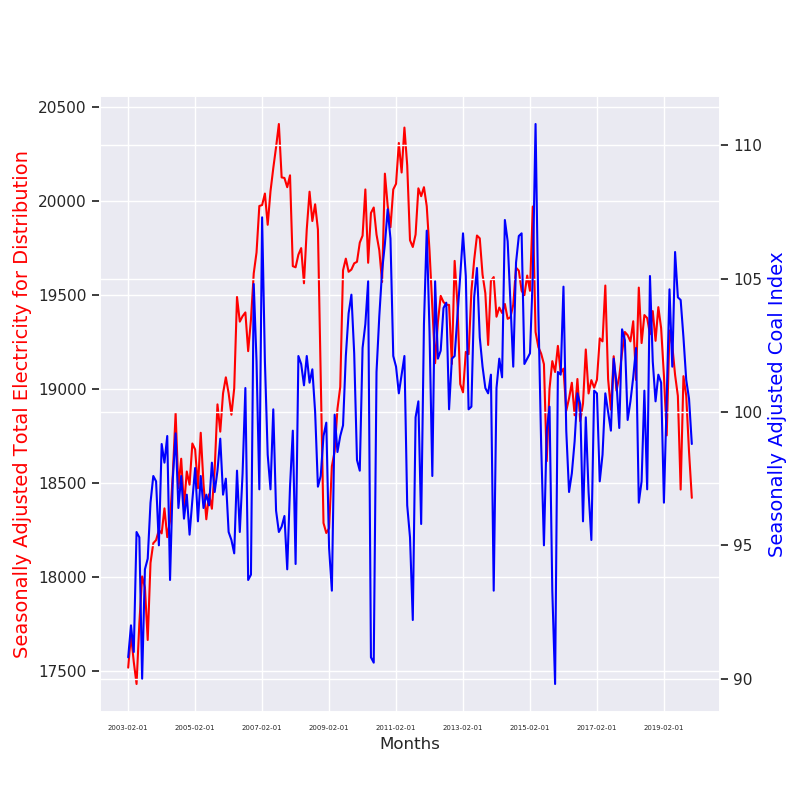

In [7]:
%matplotlib notebook
fig,ax = plt.subplots(figsize = (8,8))
ax2 = ax.twinx()

ax.plot(power_df.index, power_df['Seasonally Adjusted Total Electricity for Distribution'], color = 'red')
ax.set_ylabel('Seasonally Adjusted Total Electricity for Distribution',fontsize = 14, color = 'red')
ax.set_xlabel('Months')

ax2.plot(coal_df.index,coal_df['Seasonally Adjusted Coal Index'], color = 'blue')
ax2.set_ylabel('Seasonally Adjusted Coal Index',fontsize = 14, color = 'blue')

plt.xticks(np.arange(0,len(power_df.index),24))
ax.tick_params(axis = 'x',labelsize = 5)

sns.set()
plt.show()

In [ ]:
##acf 
#crosscorelation
#Use nonseasonal
#lag plots